# Data Preprocessing

#### Necessary imports

In [1]:
import math                                           # Various math functions
import numpy as np                                    # Special array objects useful for machine learning
import pandas as pd                                   # Versatile dataframe structures
import tensorflow as tf                               # Machine learning library
import matplotlib.pyplot as plt                       # Useful for making graphs and plots
from sklearn.preprocessing import MinMaxScaler        # Scale the data

#### Reading in the data

In [2]:
df = pd.read_csv("Data.csv") # Store the data from the csv file into a pandas dataframe

In [3]:
df

,STATION,NAME,DATE,DAPR,DASF,MDPR,MDSF,PRCP,SNOW,SNWD,...,TOBS,WT01,WT03,WT04,WT05,WT06,WT08,WT09,WT11,WT14
0,USC00045933,"MOUNT HAMILTON, CA US",1948-07-01,NaN,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00045933,"MOUNT HAMILTON, CA US",1948-07-02,NaN,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00045933,"MOUNT HAMILTON, CA US",1948-07-03,NaN,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00045933,"MOUNT HAMILTON, CA US",1948-07-04,NaN,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00045933,"MOUNT HAMILTON, CA US",1948-07-05,NaN,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26092,USC00045933,"MOUNT HAMILTON, CA US",2020-11-13,NaN,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26093,USC00045933,"MOUNT HAMILTON, CA US",2020-11-14,NaN,NaN,NaN,NaN,0.31,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26094,USC00045933,"MOUNT HAMILTON, CA US",2020-11-15,NaN,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26095,USC00045933,"MOUNT HAMILTON, CA US",2020-11-16,NaN,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for column in df:
    print(column) # A list of all the columns in the dataframe

STATION
NAME
DATE
DAPR
DASF
MDPR
MDSF
PRCP
SNOW
SNWD
TMAX
TMIN
TOBS
WT01
WT03
WT04
WT05
WT06
WT08
WT09
WT11
WT14


In [5]:
temperatures = []

for x in range(len(df["TMAX"])):  # Find the average of maximum and minimum temperatures and put them in the temperatures list
    max = df.loc[x, "TMAX"]
    min = df.loc[x, "TMIN"]
    average = (max + min) / 2
    temperatures.append(average)
    
temperatures = np.array(temperatures) # Convert into a numpy array

##### Refining the data

In [6]:
temperatures = [x for x in temperatures if math.isnan(x) == False] # Remove all NaN objects
temperatures = temperatures[:25170]
temperatures = np.array(temperatures)

In [7]:
temperatures

array([74. , 69.5, 62. , ..., 48.5, 43. , 47.5])

##### For better accuracy with the model, data should be scaled. Here the data is scaled between values of -1 and 1. The model can make faster and better predictions with these smaller and easier numbers which will result in faster training and better accuracy.

In [8]:
scaler = MinMaxScaler(feature_range=(-1, 1))
temperatures = scaler.fit_transform(temperatures.reshape(-1, 1)) # Scale all the data from values from -1 to 1.

In [9]:
temperatures # The data is now scaled

array([[ 0.57055215],
       [ 0.4601227 ],
       [ 0.27607362],
       ...,
       [-0.05521472],
       [-0.19018405],
       [-0.0797546 ]])

#### Creating the training and testing data

In [10]:
# Train data and test data
test_data_length = 20

# Split the data into training data and testing data. The length of testing data will be 20
train_data = temperatures[:len(temperatures) - test_data_length]
test_data = temperatures[-test_data_length:]

##### Features and labels are an essential part of machine learning. The features are the data that is being passed to the model such as weather data, and the label is the actual value and the result of those labels. In this case the features are going to be the past 5 days' temperatures and the label is going to be the temperature of the next day. With these values, the model can make sense of the relationship of the previous five days and the prediction of the day after.

##### Training data is the data that the model uses to recognize the relationships between the features and the labels. In our case we pass in the train_data which contains of the train_x and the train_y arrays. The train_x contains the features and the train_y contains the labels. The model can see what the actual data and it can learn based on actual events so that it can make predictions on new data.

In [11]:
train_window = 5

def create_inout_sequences(input_data, tw):
  features = []
  labels = []
  L = len(input_data)
  for i in range(L - tw):
    train_seq = input_data[i : i + tw]
    train_label = input_data[i + tw : i + tw + 1]
    features.append((train_seq))
    labels.append(train_label)

  return features, labels

In [12]:
train_x, train_y = create_inout_sequences(train_data, train_window)
train_x, train_y = np.array(train_x), np.array(train_y)

In [13]:
test_x, test_y = create_inout_sequences(test_data, train_window)
test_x, test_y = np.array(test_x), np.array(test_y)

In [14]:
train_x = train_x.reshape([train_x.shape[0], train_x.shape[1], 1]) # Resphape the training data to make it 3 Dimensional

In [15]:
train_x[:2]

array([[[ 0.57055215],
        [ 0.4601227 ],
        [ 0.27607362],
        [ 0.11656442],
        [-0.05521472]],

       [[ 0.4601227 ],
        [ 0.27607362],
        [ 0.11656442],
        [-0.05521472],
        [ 0.04294479]]])

In [16]:
train_y[:2]

array([[[0.04294479]],

       [[0.10429448]]])

# Model

In [17]:
from tensorflow.keras import Sequential                     # The type of model
from tensorflow.keras.layers import Dense, LSTM, Dropout    # The layers in the model

In [18]:
regression = Sequential()

# Tweak the unit values and the number of LSTM and Dropout layers

regression.add(LSTM(units=256, activation='tanh', return_sequences=True, input_shape=(train_x.shape[1], train_x.shape[2])))
regression.add(Dropout(0.1))

regression.add(LSTM(units=128, activation='tanh', return_sequences=True))

regression.add(LSTM(units=128, activation='tanh', return_sequences=True))

regression.add(LSTM(units=128, activation='tanh', return_sequences=True))

regression.add(LSTM(units=128, activation='tanh'))

regression.add(Dense(units=1))

In [19]:
regression.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 256)            264192    
_________________________________________________________________
dropout (Dropout)            (None, 5, 256)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 128)            197120    
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 128)            131584    
_________________________________________________________________
lstm_3 (LSTM)                (None, 5, 128)            131584    
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [20]:
regression.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
regression.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=150, batch_size=64, verbose=1)

Epoch 1/150
393/393 [==============================] - 12s 31ms/step - loss: 0.0308 - val_loss: 0.0422
Epoch 2/150
393/393 [==============================] - 11s 28ms/step - loss: 0.0162 - val_loss: 0.0454
Epoch 3/150
393/393 [==============================] - 11s 28ms/step - loss: 0.0162 - val_loss: 0.0426
Epoch 4/150
393/393 [==============================] - 11s 27ms/step - loss: 0.0160 - val_loss: 0.0426
Epoch 5/150
393/393 [==============================] - 11s 28ms/step - loss: 0.0162 - val_loss: 0.0445
Epoch 6/150
393/393 [==============================] - 11s 28ms/step - loss: 0.0161 - val_loss: 0.0394
Epoch 7/150
393/393 [==============================] - 11s 29ms/step - loss: 0.0159 - val_loss: 0.0431
Epoch 8/150
393/393 [==============================] - 11s 27ms/step - loss: 0.0160 - val_loss: 0.0458
Epoch 9/150
393/393 [==============================] - 11s 27ms/step - loss: 0.0161 - val_loss: 0.0457
Epoch 10/150
393/393 [==============================] - 11s 28ms/step - l

Epoch 80/150
393/393 [==============================] - 13s 32ms/step - loss: 0.0156 - val_loss: 0.0463
Epoch 81/150
393/393 [==============================] - 13s 33ms/step - loss: 0.0156 - val_loss: 0.0480
Epoch 82/150
393/393 [==============================] - 14s 35ms/step - loss: 0.0156 - val_loss: 0.0466
Epoch 83/150
393/393 [==============================] - 13s 33ms/step - loss: 0.0156 - val_loss: 0.0478
Epoch 84/150
393/393 [==============================] - 12s 32ms/step - loss: 0.0156 - val_loss: 0.0439
Epoch 85/150
393/393 [==============================] - 12s 32ms/step - loss: 0.0156 - val_loss: 0.0477
Epoch 86/150
393/393 [==============================] - 12s 31ms/step - loss: 0.0156 - val_loss: 0.0472
Epoch 87/150
393/393 [==============================] - 12s 32ms/step - loss: 0.0156 - val_loss: 0.0477
Epoch 88/150
393/393 [==============================] - 12s 31ms/step - loss: 0.0156 - val_loss: 0.0464
Epoch 89/150
393/393 [==============================] - 12s 31ms

In [26]:
plotPredictions = regression.predict(test_x[-10:])           # store the last ten elements of the test_x array into the 
                                                             # plotPredictions variable
    
plotPredictions = scaler.inverse_transform(plotPredictions)  # get the actual values instead of the values between -1 and 1

In [27]:
z = np.arange(90, 100)                                       # creating an array of y-coordinates
z = np.reshape(z, (10, 1))                                   # reshaping the array into proper shape

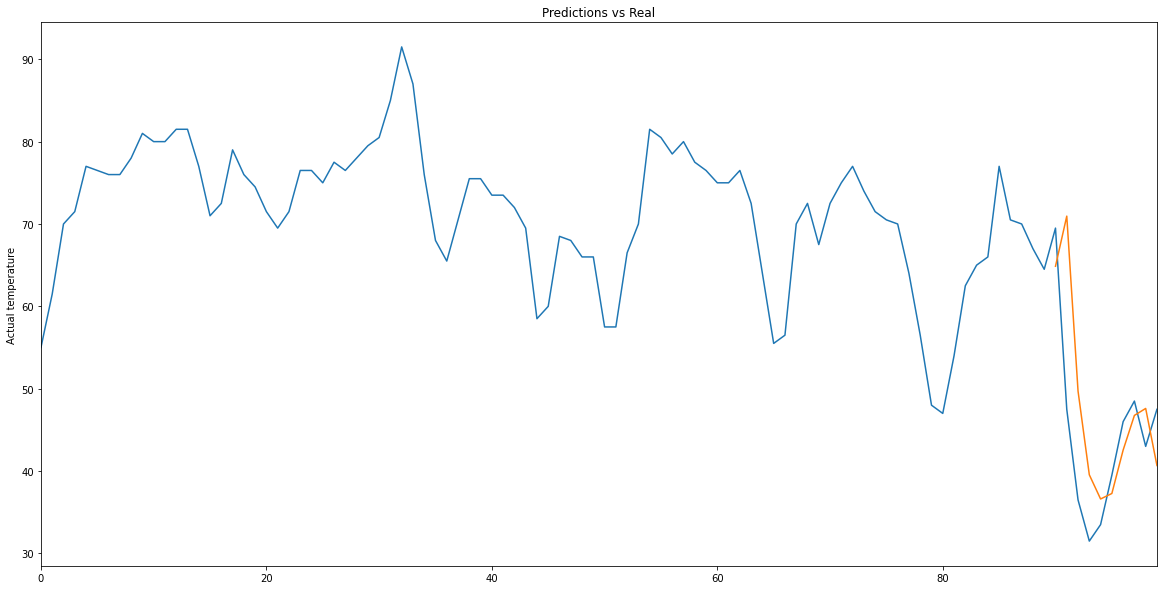

In [29]:
# Plotting the coordinates
plt.figure(figsize=(20, 10))
plt.title("Predictions vs Real")
plt.ylabel("Actual temperature")
plt.autoscale(axis='x', tight=True)
plt.plot(scaler.inverse_transform(temperatures[-100:]))
plt.plot(z, plotPredictions)
plt.show()

In [30]:
total_x, total_y = create_inout_sequences(temperatures, train_window)
total_x, total_y = np.array(total_x), np.array(total_y)

In [31]:
new_predictions = regression.predict(total_x[-150:-50])
new_predictions = scaler.inverse_transform(new_predictions)

In [32]:
something = np.arange(0, 100)

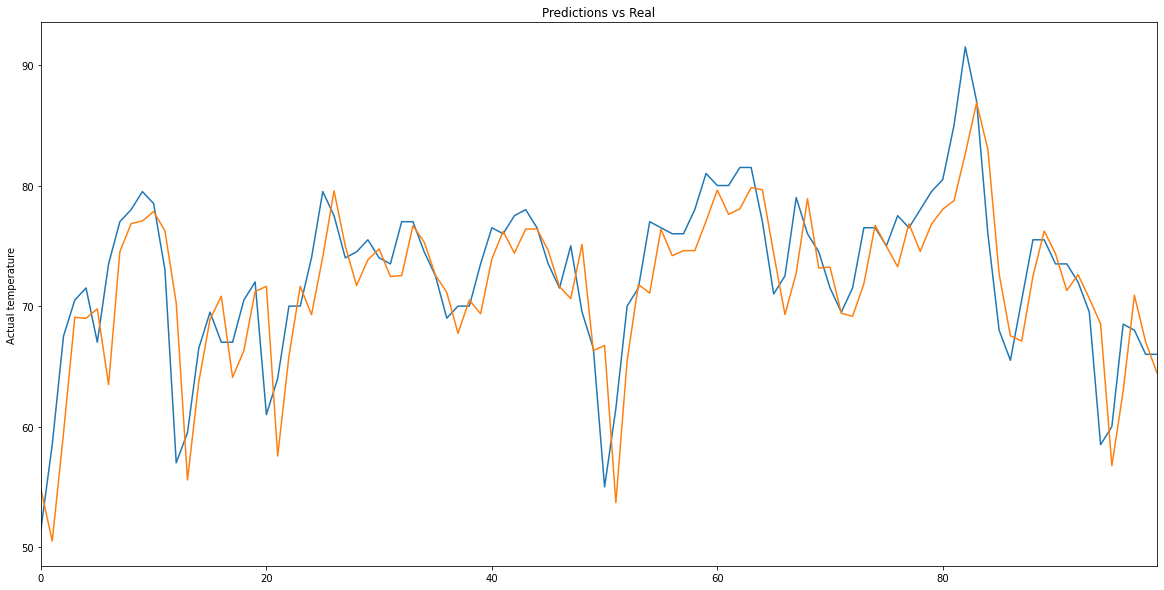

In [33]:
plt.figure(figsize=(20, 10))
plt.title("Predictions vs Real")
plt.ylabel("Actual temperature")
plt.autoscale(axis='x', tight=True)
plt.plot(scaler.inverse_transform(temperatures[-150:-50]))
plt.plot(something, new_predictions)
plt.show()